In [1]:
# cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_3/clonalShift_method_clones/cells_meta.tsv"
# indir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor0"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_3/clonalShift_method_clones/top/scrap"
# clone_order_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_3/clonalShift_method_clones/clones_ranked/cloneID_rank_ncells.txt"

cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/single_clones/donor0/cloneMethod_variants_init_knn_resolution_30/clonalShift_method_clones/cells_meta.tsv"
indir = "/data/Mito_Trace/output/pipeline/v04/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/clones/variants_init/knn/kparam_30"
outdir = "/data/Mito_Trace/output/pipeline/v04/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/single_clones/donor0/cloneMethod_variants_init_knn_resolution_30/clonalShift_method_clones/top"
clone_order_f = "/data/Mito_Trace/output/pipeline/v04/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/single_clones/donor0/cloneMethod_variants_init_knn_resolution_30/clonalShift_method_clones/clones_ranked/cloneID_rank_ncells.txt"

ntop_clones = 10
af_thresh = 0.001
cov_thresh = 2
ntop_vars=10

mt_ref="/data/Mito_Trace/data/processed/genomes/mtMasked/GRCh38_MT_blacklist_A2_2020/chrM.fasta"



In [2]:
import src.utils.variant_utils as vu
from collections import OrderedDict
from matplotlib.lines import Line2D
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import mplh.fig_utils as fu

import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)

import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})

plt.rcParams['svg.fonttype'] = 'none'

fig_utils from mplh
0.5.6


In [3]:
import seaborn as sns
from mplh import cluster_help as ch
from src.utils.data_io import reverse_ids


In [4]:
clone_order = pd.read_csv(clone_order_f, header=None)[0].values
top_clones = clone_order[:ntop_clones]
top_clones

array(['0_0', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7', '0_8', '0_9',
       '0_10'], dtype=object)

In [5]:
clone_order

array(['0_0', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7', '0_8', '0_9',
       '0_10', '0_11', '0_12', '0_13', '0_14', '0_15'], dtype=object)

In [6]:
#af_indir = join(indir, "sc_af", f"donor{DONOR}")
af_indir = indir

AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t")
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t")


#out_f = join(outdir, f"donor{DONOR}")


In [7]:
#donor_vars = AF_df>0.9

In [8]:
cells_meta = pd.read_csv(cells_meta_f,sep="\t", index_col=0)
cells_meta = reverse_ids(cells_meta)
cells_meta

,cloneID,clusterID,condition,donor
AAACGAAAGTACAACA-1_Flt3l,0_7,5,Flt3l,0
AAACTCGAGCAATAAC-1_Flt3l,0_4,6,Flt3l,0
AAACTCGCAATGCACT-1_Flt3l,0_8,5,Flt3l,0
AAACTCGCACACACCG-1_Flt3l,0_7,7,Flt3l,0
AAACTCGCATGCGTTA-1_Flt3l,0_3,4,Flt3l,0
...,...,...,...,...
TTTGTGTCATTTCTTG-1_Flt3l,0_3,2,Flt3l,0
TTTGTGTGTGAATACA-1_Flt3l,0_0,4,Flt3l,0
TTTGTGTTCAAAGTAG-1_Flt3l,0_4,1,Flt3l,0
TTTGTGTTCCTTTGCG-1_Flt3l,0_0,4,Flt3l,0


## Get donor-specific variants

In [9]:
def get_high_variants(df, thresh, pct_thresh):
    """ Remove rows that have an average higher than threshold

    :param df:
    :param thresh:
    :return:
    """
    n_pct = pct_thresh*df.shape[0]
    return df.loc[:,((df>thresh).sum()>n_pct)].columns.values


donor_vars = get_high_variants(AF_df, thresh=0.8, pct_thresh=0.9)
print(f"number of donor vars: {len(donor_vars)}")

if len(donor_vars)>1:
    g = sns.clustermap(AF_df.loc[:, donor_vars])
    g.fig.savefig(fname=join(outdir, f"donor_variants.pdf"))
#plt.savefig(join(outdir, "donor_vars.png"))

number of donor vars: 0


## variant types

In [10]:
# Get variant types
variants_df = vu.add_ref_to_variants(variants=AF_df.columns.values,
                                     mt_df=vu.load_mt_ref(mt_ref))

variants_df = vu.type_of_variants(variants_df, to_preproc=False)

In [11]:
variants_df.head()

,pos,ref,alt,variant type,variant change
10086G,10086,A,G,Transition,A>G
10290A,10290,G,A,Transition,G>A
10318C,10318,T,C,Transition,T>C
10373A,10373,G,A,Transition,G>A
10400T,10400,C,T,Transition,C>T


## Filter for clone

In [12]:
AF_df = AF_df.transpose()
DP_df = DP_df.transpose()

In [13]:
AF_df.head()

,AAACGAAAGTACAACA-1_Flt3l,AAACTCGAGCAATAAC-1_Flt3l,AAACTCGCAATGCACT-1_Flt3l,AAACTCGCACACACCG-1_Flt3l,AAACTCGCATGCGTTA-1_Flt3l,AAACTCGCATTAGCCA-1_Flt3l,AAACTCGGTACGCCCA-1_Flt3l,AAACTCGGTCATTGGT-1_Flt3l,AAACTCGGTCTGGTTA-1_Flt3l,AAACTCGGTGTCGTGC-1_Flt3l,...,TTTGCGCCACGCTAAT-1_Flt3l,TTTGCGCTCAGGGTTT-1_Flt3l,TTTGGCCCATGTAGAA-1_Flt3l,TTTGGCCGTACAAATG-1_Flt3l,TTTGGCCTCAGGTCTA-1_Flt3l,TTTGGCCTCCCTAAAG-1_Flt3l,TTTGGCCTCTATCTTG-1_Flt3l,TTTGGTTAGTCCGTGC-1_Flt3l,TTTGGTTGTTAACCAC-1_Flt3l,TTTGTGTTCTCCTTGG-1_Flt3l
10086G,0.0,0.0,0.027027,0.0,0.0,0.000000,0.0,0.0,0.032258,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10290A,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10318C,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10373A,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10400T,0.0,0.0,0.000000,0.0,0.0,0.153846,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Remove donor-specific variants

In [14]:
# Remove Donor variannts
AF_df = AF_df.loc[~(AF_df.index.isin(donor_vars))]
DP_df = DP_df.loc[AF_df.index, AF_df.columns] 

# Figure: 1: barplot for each clone, where x=Variant, and the % of cells (and raw) in the clone that has the variant and % of cells from other clone with variant


In [15]:
top_cells_meta = cells_meta[cells_meta["cloneID"].isin(top_clones)] 
top_cells_meta

,cloneID,clusterID,condition,donor
AAACGAAAGTACAACA-1_Flt3l,0_7,5,Flt3l,0
AAACTCGAGCAATAAC-1_Flt3l,0_4,6,Flt3l,0
AAACTCGCAATGCACT-1_Flt3l,0_8,5,Flt3l,0
AAACTCGCACACACCG-1_Flt3l,0_7,7,Flt3l,0
AAACTCGCATGCGTTA-1_Flt3l,0_3,4,Flt3l,0
...,...,...,...,...
TTTGTGTCATTTCTTG-1_Flt3l,0_3,2,Flt3l,0
TTTGTGTGTGAATACA-1_Flt3l,0_0,4,Flt3l,0
TTTGTGTTCAAAGTAG-1_Flt3l,0_4,1,Flt3l,0
TTTGTGTTCCTTTGCG-1_Flt3l,0_0,4,Flt3l,0


In [16]:
bin_AF_df = (AF_df > af_thresh) & (DP_df > cov_thresh)
bin_AF_df

,AAACGAAAGTACAACA-1_Flt3l,AAACTCGAGCAATAAC-1_Flt3l,AAACTCGCAATGCACT-1_Flt3l,AAACTCGCACACACCG-1_Flt3l,AAACTCGCATGCGTTA-1_Flt3l,AAACTCGCATTAGCCA-1_Flt3l,AAACTCGGTACGCCCA-1_Flt3l,AAACTCGGTCATTGGT-1_Flt3l,AAACTCGGTCTGGTTA-1_Flt3l,AAACTCGGTGTCGTGC-1_Flt3l,...,TTTGCGCCACGCTAAT-1_Flt3l,TTTGCGCTCAGGGTTT-1_Flt3l,TTTGGCCCATGTAGAA-1_Flt3l,TTTGGCCGTACAAATG-1_Flt3l,TTTGGCCTCAGGTCTA-1_Flt3l,TTTGGCCTCCCTAAAG-1_Flt3l,TTTGGCCTCTATCTTG-1_Flt3l,TTTGGTTAGTCCGTGC-1_Flt3l,TTTGGTTGTTAACCAC-1_Flt3l,TTTGTGTTCTCCTTGG-1_Flt3l
10086G,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
10290A,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10318C,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10373A,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10400T,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5978G,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
634C,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6497G,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6546A,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Create variant-clone (and non-clone) percent of cells in clone with variant

In [17]:
def calc_clone_pct(data, **kwargs):
    curr_AF_df = bin_AF_df.loc[:,data.index]
    other_curr_AF_df = bin_AF_df.loc[:, ~(bin_AF_df.columns.isin(data.index))]
    
    curr_AF_tot = curr_AF_df.sum(axis=1)
    curr_AF_pct = 100*curr_AF_tot/curr_AF_df.shape[1]
    
    other_curr_AF_tot = other_curr_AF_df.sum(axis=1)
    other_curr_AF_pct = 100*other_curr_AF_tot/other_curr_AF_df.shape[1]
        
    return pd.concat((pd.DataFrame(curr_AF_pct).rename({0:"clone_pct"}, axis=1),
               pd.DataFrame(other_curr_AF_pct).rename({0:"other_clone_pct"}, axis=1)),axis=1, 
             ignore_index=False).rename_axis("variant")
    

pct_clones_df = top_cells_meta.groupby("cloneID").apply(calc_clone_pct).reset_index()
pct_clones_df

,cloneID,variant,clone_pct,other_clone_pct
0,0_0,10086G,9.438776,8.307259
1,0_0,10290A,0.510204,0.203379
2,0_0,10318C,4.081633,2.816020
3,0_0,10373A,15.816327,12.202753
4,0_0,10400T,11.989796,9.245932
...,...,...,...,...
2695,0_9,5978G,0.000000,0.270636
2696,0_9,634C,0.000000,0.616449
2697,0_9,6497G,0.000000,0.270636
2698,0_9,6546A,0.000000,0.420989


## Rank variants for each clone by sorting by mannwhitneyu test of allele-frequency


In [18]:
from scipy.stats import mannwhitneyu

In [19]:
def rank_unique_vars_clone_af(clone_cells):
    clones_af = AF_df.loc[:,clone_cells.index].fillna(0)
    other_clones_af = AF_df.loc[:, ~(AF_df.columns.isin(clone_cells.index))].fillna(0)
    pvals = mannwhitneyu(clones_af, other_clones_af, alternative='greater', axis=1).pvalue
    rankings = pd.DataFrame(index=clones_af.index,data=pvals).rank(method="min").rename({0:"rank"}, axis=1) # np.argsort(pvals)
    #print(type(rankings))
    #print('rankings', rankings)

    rankings["pval"] = pvals
    rankings["rank"]= rankings["rank"].astype('int')
    #print('rankings', rankings)
    #print('rankings', rankings.head())
    rankings.index.name = "variant"
    return rankings

pvals_df = cells_meta.groupby("cloneID").apply(rank_unique_vars_clone_af).reset_index()
pvals_df

,cloneID,variant,rank,pval
0,0_0,10086G,123,0.328203
1,0_0,10290A,112,0.104770
2,0_0,10318C,108,0.078879
3,0_0,10373A,106,0.073856
4,0_0,10400T,107,0.075930
...,...,...,...,...
4045,0_9,5978G,141,0.726066
4046,0_9,634C,167,0.818144
4047,0_9,6497G,142,0.726066
4048,0_9,6546A,150,0.773363


In [20]:
pct_pvals_df = pd.merge(pct_clones_df, pvals_df, on=["cloneID", "variant"])
pct_pvals_df

,cloneID,variant,clone_pct,other_clone_pct,rank,pval
0,0_0,10086G,9.438776,8.307259,123,0.328203
1,0_0,10290A,0.510204,0.203379,112,0.104770
2,0_0,10318C,4.081633,2.816020,108,0.078879
3,0_0,10373A,15.816327,12.202753,106,0.073856
4,0_0,10400T,11.989796,9.245932,107,0.075930
...,...,...,...,...,...,...
2695,0_9,5978G,0.000000,0.270636,141,0.726066
2696,0_9,634C,0.000000,0.616449,167,0.818144
2697,0_9,6497G,0.000000,0.270636,142,0.726066
2698,0_9,6546A,0.000000,0.420989,150,0.773363


In [21]:
# pct_pvals_df["variant type"] = pct_pvals_df["variant"].apply(lambda x: variants_df.loc[x, "variant type"])
# pct_pvals_df["variant change"] = pct_pvals_df["variant"].apply(lambda x: variants_df.loc[x, "variant change"])
# pct_pvals_df["variant type"] = ["Ts" if x =="Transition" else "Tv" for x in pct_pvals_df["variant type"].values]
# pct_pvals_df

In [22]:
pct_clones_df["variant type"] = pct_clones_df["variant"].apply(lambda x: variants_df.loc[x, "variant type"])
#pct_clones_df["variant change"] = pct_clones_df["variant"].apply(lambda x: variants_df.loc[x, "variant change"])
#pct_clones_df["variant type"] = ["Ts" if x =="Transition" else "Tv" for x in pct_clones_df["variant type"].values]

In [23]:
pct_clones_df.groupby(["cloneID", "variant type"]).size()

cloneID  variant type
0_0      Transition      157
         Transversion    113
0_10     Transition      157
         Transversion    113
0_2      Transition      157
         Transversion    113
0_3      Transition      157
         Transversion    113
0_4      Transition      157
         Transversion    113
0_5      Transition      157
         Transversion    113
0_6      Transition      157
         Transversion    113
0_7      Transition      157
         Transversion    113
0_8      Transition      157
         Transversion    113
0_9      Transition      157
         Transversion    113
dtype: int64

In [24]:
def plot_pct_bar(data, **kwargs):
    ntop_vars = kwargs.get("ntop_vars", 0)
    data = data.set_index("variant")
    if ntop_vars != 0:
        data = data[data['rank']<ntop_vars].sort_values("rank")
        ax = data[["clone_pct", "other_clone_pct"]].plot.bar(ax=plt.gca())
        plt.gca().set_ylabel("% cells with variant")
            
    else:
        data = data.loc[(data["clone_pct"]-data["other_clone_pct"]).sort_values()[::-1].index]
        #print(data[data==0].head())
        #data = data.sort_values("clone_pct")[::-1]
        #print(data["clone_pct"]-data["other_clone_pct"])
        
        var_type_leg_order = OrderedDict()
        for vt in data["variant type"].values:
            var_type_leg_order[vt] = True
        var_type_leg_order = list(var_type_leg_order.keys())
        

        colors = ["blue" if i == "Transition" else "green" for i in data["variant type"].values]
        #ax = pd.DataFrame((data["clone_pct"]-data["other_clone_pct"])).plot.bar(ax=plt.gca())
        
        plt.gca().bar(x=data.index, 
                height = (data["clone_pct"].fillna(0)-data["other_clone_pct"].fillna(0)).values,
                color=colors, label=data["variant type"].values)
        plt.xticks(rotation=90)
        plt.gca().set_ylabel("(% cells in clone with variant) - (%cells not in clone with variant)")
        custom_lines = [Line2D([0], [0], color="blue", lw=4),
                        Line2D([0], [0], color="green", lw=4)]
        plt.gca().legend(custom_lines, ['Transition', 'Transversion'], loc='best')
        
        #ax.set_label()
        #plt.bar(data, vals, width, color=colors)
        #plt.gca().legend(loc='best') 
    return

## Figure: Barplot of percent in clone vs percent not in clone

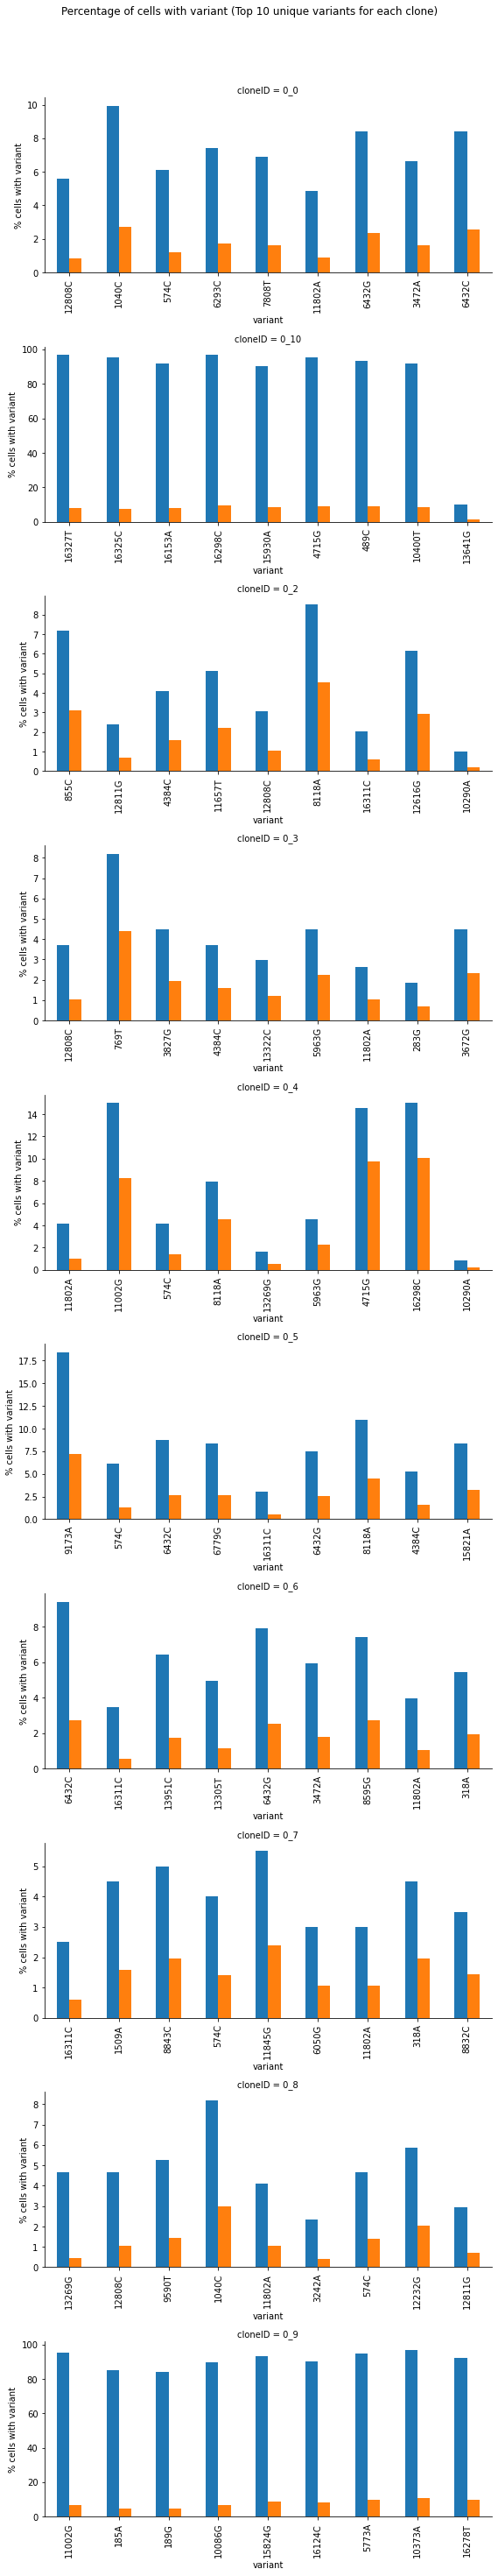

In [25]:
g = sns.FacetGrid(data=pct_pvals_df, col = "cloneID", col_wrap=1, height=4, aspect=2,
                 sharex=False, sharey=False)
g.map_dataframe(plot_pct_bar, ntop_vars=ntop_vars)
g.fig.suptitle(f"Percentage of cells with variant (Top {ntop_vars} unique variants for each clone)", y=1.02)
g.fig.savefig(fname=join(outdir, f"top_variants_distinct_pct_vs_other.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)
g.fig.savefig(fname=join(outdir, f"top_variants_distinct_pct_vs_other.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)

plt.tight_layout()


## Figure: Barplot of percent in clone - percent not in clone. Showing for all variants

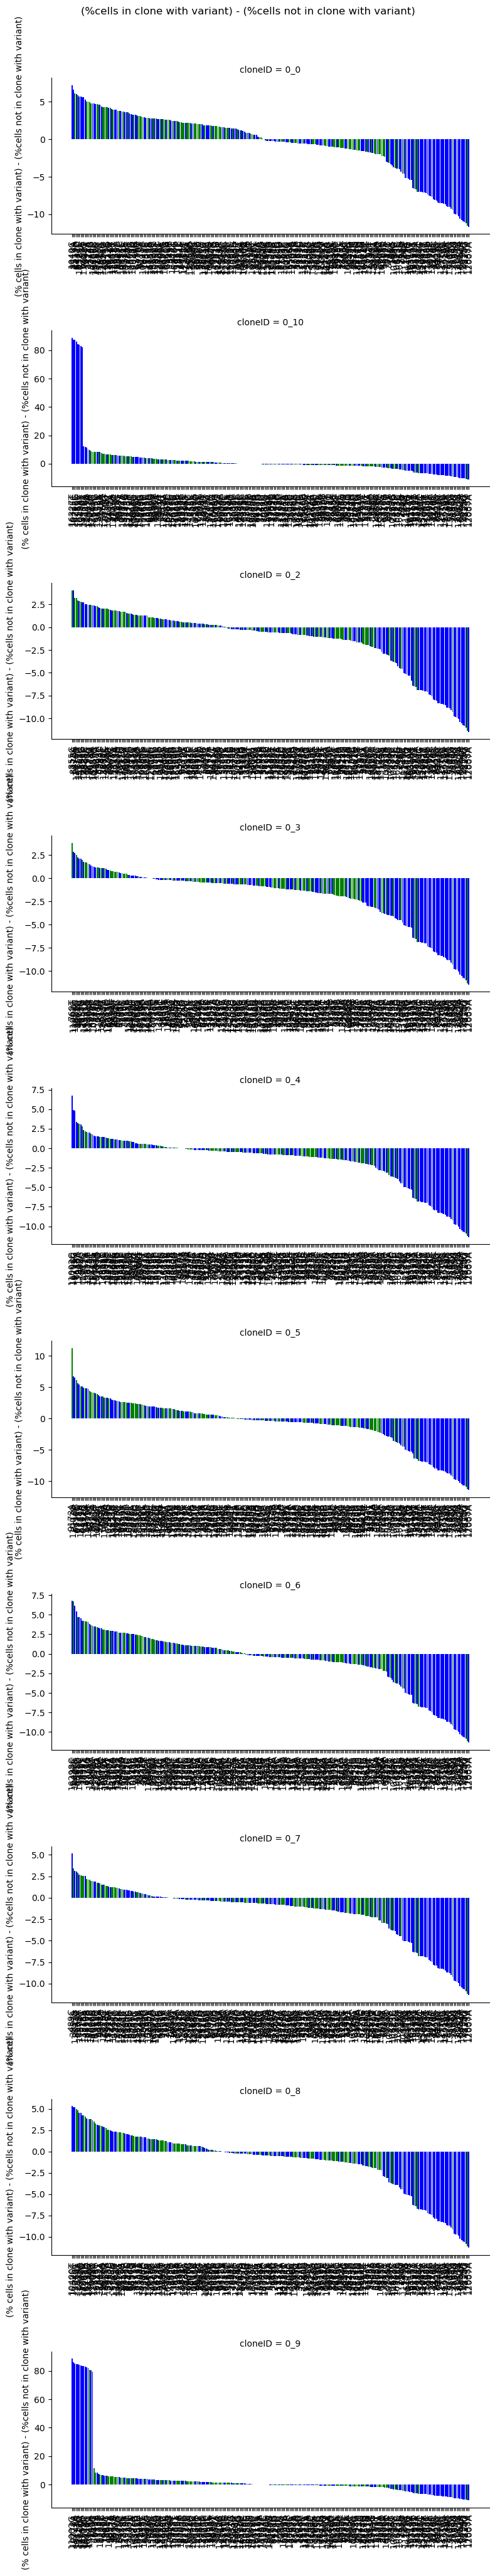

In [26]:
g = sns.FacetGrid(data=pct_clones_df, col = "cloneID", col_wrap=1, height=4, aspect=2,
                 sharex=False, sharey=False)
g.map_dataframe(plot_pct_bar)
#g.fig.legend()
#g.add_legend(["Transition", "Transversion"])
plt.tight_layout()
g.fig.suptitle("(%cells in clone with variant) - (%cells not in clone with variant)", y=1.02)
g.fig.savefig(fname=join(outdir, f"top_variants_pct_minus_other.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)
g.fig.savefig(fname=join(outdir, f"top_variants_pct_minus_other.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)




In [27]:
def plot_violin(data, **kwargs):
    ntop_vars = kwargs.get("ntop_vars", 0)
    curr_clone = data["cloneID"].values[0]
    print('curr_clone', curr_clone)
    curr_AF_df = AF_df.loc[:,data.index]
    other_curr_AF_df = AF_df.loc[:, ~(AF_df.columns.isin(data.index))]
    
    curr_AF_df = curr_AF_df.reset_index().melt(id_vars='index', var_name="cell", value_name="AF")
    curr_AF_df["type"] = "clone"
    
    other_curr_AF_df = other_curr_AF_df.reset_index().melt(id_vars='index', var_name="cell", value_name="AF")
    other_curr_AF_df["type"] = "other"
    curr_merge_df = pd.concat((curr_AF_df, other_curr_AF_df), axis=0)
    curr_merge_df = curr_merge_df.rename({"index":"variant"}, axis=1)
    #print(curr_merge_df.head())
    if ntop_vars != 0:
        #print(pct_pvals_df[(pct_pvals_df["cloneID"]==curr_clone)])
        if pct_pvals_df[(pct_pvals_df["cloneID"]==curr_clone)].shape[0] == 0:
            return
        curr_top_vars = pct_pvals_df[(pct_pvals_df["cloneID"]==curr_clone) & (pct_pvals_df["rank"]<=ntop_vars)].sort_values("rank")["variant"].values
        print('top vars', curr_top_vars)
        #print('before top vars',curr_merge_df.shape)
        curr_merge_df = curr_merge_df[curr_merge_df["variant"].isin(curr_top_vars)] #data[data['rank']<ntop_vars].sort_values("rank")
        #print('after top vars',curr_merge_df.shape)
        
    sns.boxenplot(data=curr_merge_df, x="variant", y="AF", hue="type", ax=plt.gca())
    return 
    

## Violin plots for Allele frequency

curr_clone 0_0
top vars ['12808C' '1040C' '574C' '6293C' '7808T' '11802A' '6432G' '3472A' '6432C'
 '1471T']
curr_clone 0_2
top vars ['855C' '12811G' '4384C' '11657T' '12808C' '8118A' '16311C' '12616G'
 '10290A' '7167C']
curr_clone 0_3
top vars ['12808C' '769T' '3827G' '4384C' '13322C' '5963G' '11802A' '283G' '3672G'
 '12811G']
curr_clone 0_4
top vars ['11802A' '11002G' '574C' '8118A' '13269G' '5963G' '4715G' '16298C'
 '10290A' '775T']
curr_clone 0_5
top vars ['9173A' '574C' '6432C' '6779G' '16311C' '6432G' '8118A' '4384C' '15821A'
 '12811G']
curr_clone 0_6
top vars ['6432C' '16311C' '13951C' '13305T' '6432G' '3472A' '8595G' '11802A'
 '318A' '12079T']
curr_clone 0_7
top vars ['16311C' '1509A' '8843C' '574C' '11845G' '6050G' '11802A' '318A' '8832C'
 '489C']
curr_clone 0_8
top vars ['13269G' '12808C' '9590T' '1040C' '11802A' '3242A' '574C' '12232G'
 '12811G' '769T']
curr_clone 0_9
top vars ['11002G' '185A' '189G' '10086G' '15824G' '16124C' '5773A' '10373A'
 '16278T' '15311G']
curr_clone 0

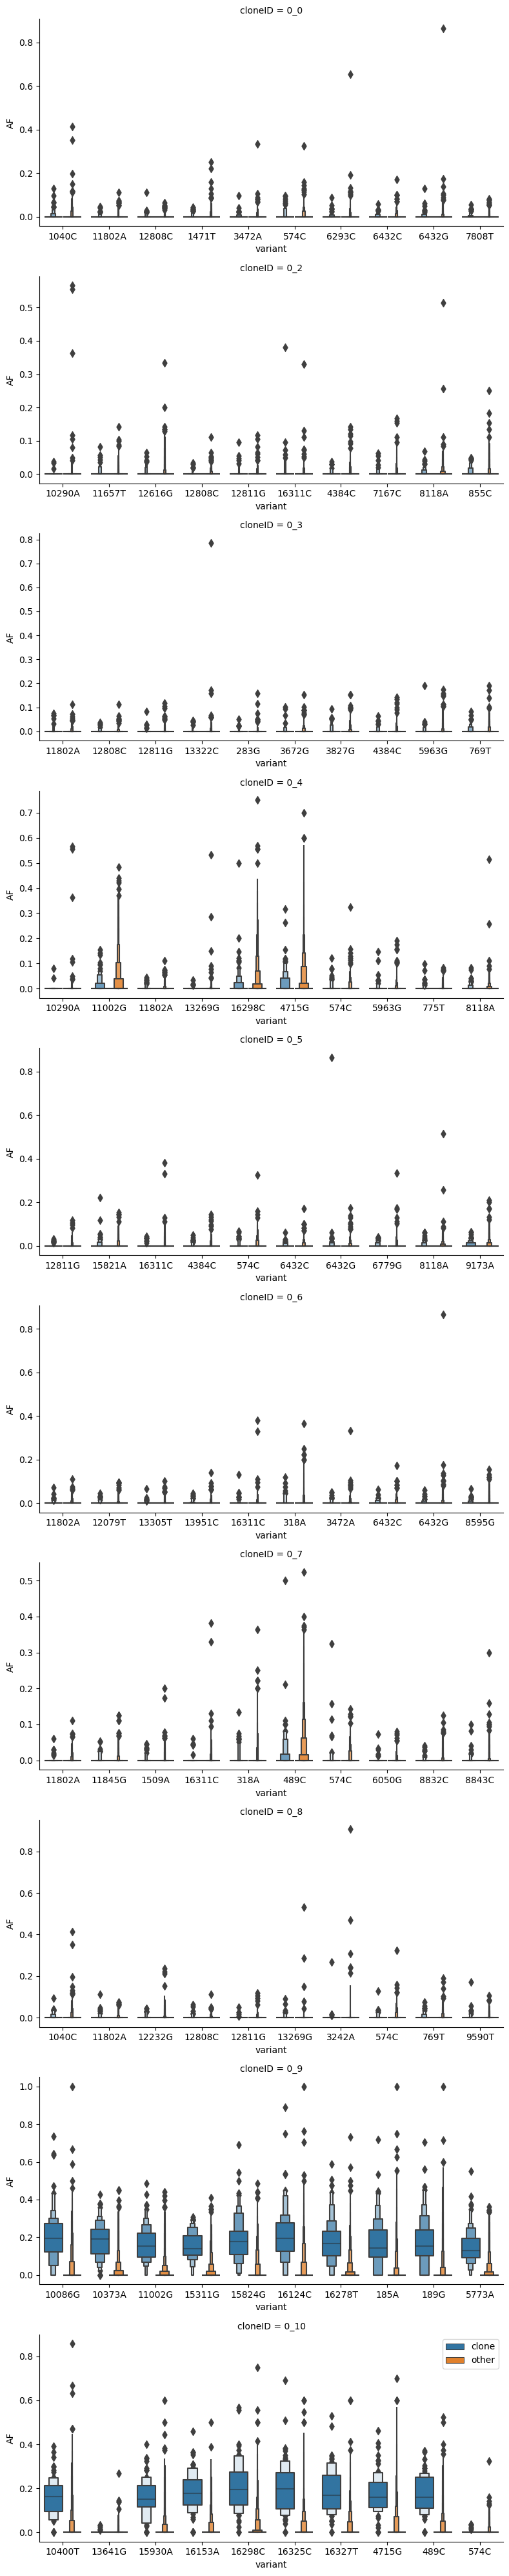

In [28]:
g = sns.FacetGrid(data=cells_meta, col="cloneID", col_order=top_clones, col_wrap=1, height=4, aspect=2, sharex=False, sharey=False)
g.map_dataframe(plot_violin, ntop_vars=10 )
plt.legend(loc='upper right')
g.fig.savefig(fname=join(outdir, f"top_variants_in_clone_af_boxen.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)
g.fig.savefig(fname=join(outdir, f"top_variants_in_clone_af_boxen.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)


# Plot variants as row and clone as x AF violin

In [29]:
def long_af(ser, cells_meta):
    v = ser.name
    cells_meta["Variant"] = v
    #print('ser', pd.DataFrame(ser))
    cells_meta  = pd.merge(pd.DataFrame(ser).rename({v:"af"}, axis=1), 
             cells_meta, left_index=True, right_index=True, how='inner' )
    #cells_meta.loc[ser.index, "AF"] = ser
    return cells_meta
    
long_af = AF_df.apply(long_af, cells_meta=cells_meta, axis=1)
long_af = pd.concat(long_af.values, axis=0)

In [30]:
vars_min_over_median = pct_pvals_df.groupby("variant").apply(lambda x: min(x['rank']+1)/np.median(x['rank']+1))
vars_min_over_median = vars_min_over_median.sort_values()
vars_order = vars_min_over_median.index
vars_min_over_median


variant
185A      0.011696
189G      0.012308
16327T    0.021164
9173A     0.027778
855C      0.033333
            ...   
11914A    1.000000
8027A     1.000000
12160G    1.000000
16111T    1.000000
3735G     1.000000
Length: 270, dtype: float64

In [43]:
print(len(vars_order))
vars_order = [x for x in vars_order.values if x in (long_af["Variant"].unique())]
print(len(vars_order))

270
270


In [47]:
long_af.groupby("Variant").apply(lambda x: (x["af"] == 0).all())

Variant
10086G    False
10242G    False
10254C    False
10290A    False
10318C    False
          ...  
9545G     False
9590T     False
9658G     False
9823A     False
983T      False
Length: 270, dtype: bool

In [49]:
nvars = len(vars_order)
nfigs = int(np.round(nvars/16))
out_fs = []
for curr_f in range(nfigs):
    end_ind = min((curr_f+1)*16, nvars)
    curr_vars = vars_order[(curr_f*16):end_ind]
    print('curr_vars', len(curr_vars), curr_vars)
    curr_file = join(outdir, f"top_variants_{curr_f+1}_{(end_ind+1)}_af.svg")
    g = sns.catplot(data=long_af[long_af["Variant"].isin(curr_vars)], x="cloneID", y="af", col="Variant", col_wrap=2, kind='boxen', 
                sharey=False, col_order=curr_vars,
                order=top_clones, height=2, aspect=2)
    g.fig.savefig(fname=curr_file, bbox_inches='tight', pad_inches=0.5)
    out_fs.append(curr_file)
    plt.close()
cmd = f"svg_stack.py --direction=h --margin=100 {' '.join(out_fs)} > {join(outdir, 'top_variants_af.svg')}"
print(cmd)
os.system(cmd)
for f in out_fs:
    os.remove(f)
    #!{cmd}

    #g.fig.savefig(fname=join(outdir, f"top_variants_af.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)


curr_vars 16 ['185A', '189G', '16327T', '9173A', '855C', '16325C', '6432C', '10086G', '16153A', '13269G', '1509A', '11657T', '15824G', '16124C', '1040C', '4384C']
curr_vars 16 ['6779G', '3242A', '10373A', '12808C', '11002G', '5773A', '769T', '15930A', '16298C', '3827G', '13951C', '13305T', '16278T', '6293C', '9590T', '13322C']
curr_vars 16 ['16519C', '775T', '8595G', '15311G', '13145A', '4715G', '14971C', '13105G', '14560A', '318A', '12811G', '489C', '6432G', '6109C', '10400T', '13641G']
curr_vars 16 ['8843C', '3630A', '16311C', '13914A', '13625T', '7808T', '6050G', '2514A', '11989G', '1949A', '12616G', '1471T', '3655A', '15821A', '12529C', '283G']
curr_vars 16 ['7032A', '12232G', '10318C', '16512A', '6293G', '7167C', '3937A', '6364A', '6833C', '5963G', '6904C', '8770T', '14991A', '10290A', '11845G', '16387G']
curr_vars 16 ['3801C', '11802A', '2031G', '12902G', '6470C', '7849T', '6838C', '6890G', '8536C', '15672C', '14614T', '11204A', '12283T', '8968C', '4042C', '799G']
curr_vars 16 ['

In [50]:
outdir

'/data/Mito_Trace/output/pipeline/v04/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/single_clones/donor0/cloneMethod_variants_init_knn_resolution_30/clonalShift_method_clones/top'

In [32]:
# g = sns.catplot(data=long_af, x="cloneID", y="af", col="Variant", col_wrap=2, kind='boxen', 
#             sharey=False, col_order=vars_order,
#             height=4, aspect=2, order=top_clones)
# #g.fig.savefig(fname=join(outdir, f"top_variants_af.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)
# g.fig.savefig(fname=join(outdir, f"top_variants_af.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)

## Overlapping variants across clones